# Importing Libraries

In [802]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from xgboost import XGBRegressor

pd.set_option("display.max_colwidth",None)
import warnings
warnings.filterwarnings("ignore")

# Project
## Zara Sales ML Analysis

In [803]:
df=pd.read_csv(r"C:\Users\user\Desktop\Kaggle Datasets\Zara Sales Analysis\Zara_Sales_Analysis.csv",delimiter=";")

# Data Info

In [804]:
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket-p06985450.html,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop fabric. High collar and adjustable long sleeves with adhesive straps. Welt pockets at hip. Adjustable hem with side elastics. Front zip closure.,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p08896675.html,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and long sleeves with buttoned cuffs. Welt pockets at hip and interior pocket. Central back vent at hem. Front button closure.,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacket-p01564520.html,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sleeves with buttoned cuffs. Welt pocket at chest and flap pockets at hip. Interior pocket. Back vents. Front button closure.,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket-p01564300.html,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. Notched lapel collar. Long sleeves with buttoned cuffs. Welt pocket at chest and flap pockets at hip. Interior pocket. Back vents. Front button closure.,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket-p08281477.html,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling with fleece interior. Tabbed lapel collar. Long sleeves. Zip pockets at hip. Front zip closure.,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


In [805]:
df.shape

(252, 16)

In [806]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        252 non-null    int64  
 1   Product Position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Product Category  252 non-null    object 
 4   Seasonal          252 non-null    object 
 5   Sales Volume      252 non-null    int64  
 6   brand             252 non-null    object 
 7   url               252 non-null    object 
 8   sku               252 non-null    object 
 9   name              251 non-null    object 
 10  description       250 non-null    object 
 11  price             252 non-null    float64
 12  currency          252 non-null    object 
 13  scraped_at        252 non-null    object 
 14  terms             252 non-null    object 
 15  section           252 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory u

# Data Handling & Cleaning

In [807]:
df.isna().sum()
df.dropna(inplace=True)
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [808]:
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket-p06985450.html,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop fabric. High collar and adjustable long sleeves with adhesive straps. Welt pockets at hip. Adjustable hem with side elastics. Front zip closure.,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p08896675.html,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and long sleeves with buttoned cuffs. Welt pockets at hip and interior pocket. Central back vent at hem. Front button closure.,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacket-p01564520.html,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sleeves with buttoned cuffs. Welt pocket at chest and flap pockets at hip. Interior pocket. Back vents. Front button closure.,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket-p01564300.html,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. Notched lapel collar. Long sleeves with buttoned cuffs. Welt pocket at chest and flap pockets at hip. Interior pocket. Back vents. Front button closure.,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket-p08281477.html,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling with fleece interior. Tabbed lapel collar. Long sleeves. Zip pockets at hip. Front zip closure.,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


In [809]:
df.rename(columns={"price": "price_usd"}, inplace=True)


In [810]:
df.columns

Index(['Product ID', 'Product Position', 'Promotion', 'Product Category',
       'Seasonal', 'Sales Volume', 'brand', 'url', 'sku', 'name',
       'description', 'price_usd', 'currency', 'scraped_at', 'terms',
       'section'],
      dtype='object')

In [811]:
df.drop(columns=["Product ID","url","sku","description","currency","scraped_at","brand",'Product Category'],inplace=True) # Removing columns for a clean dataset

# EDA & Visualization

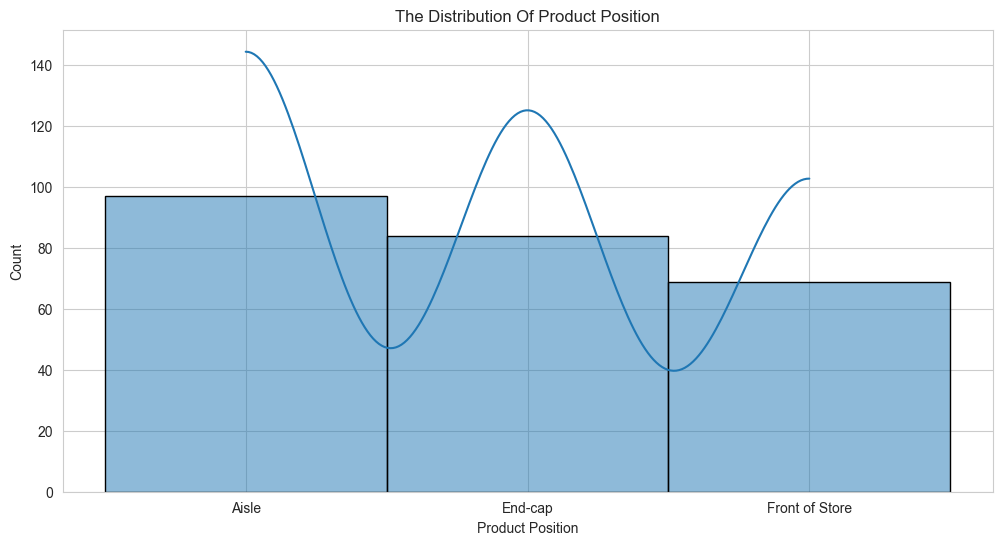

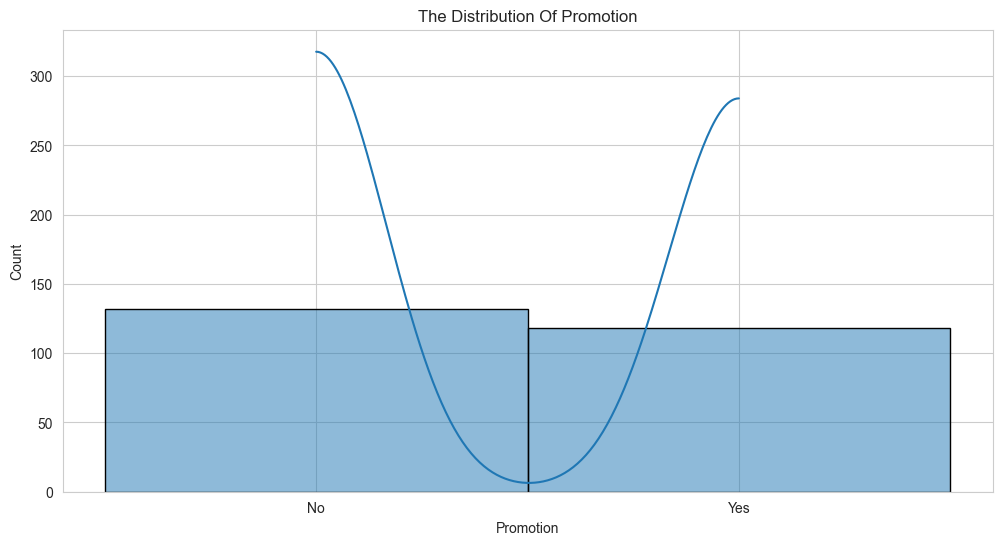

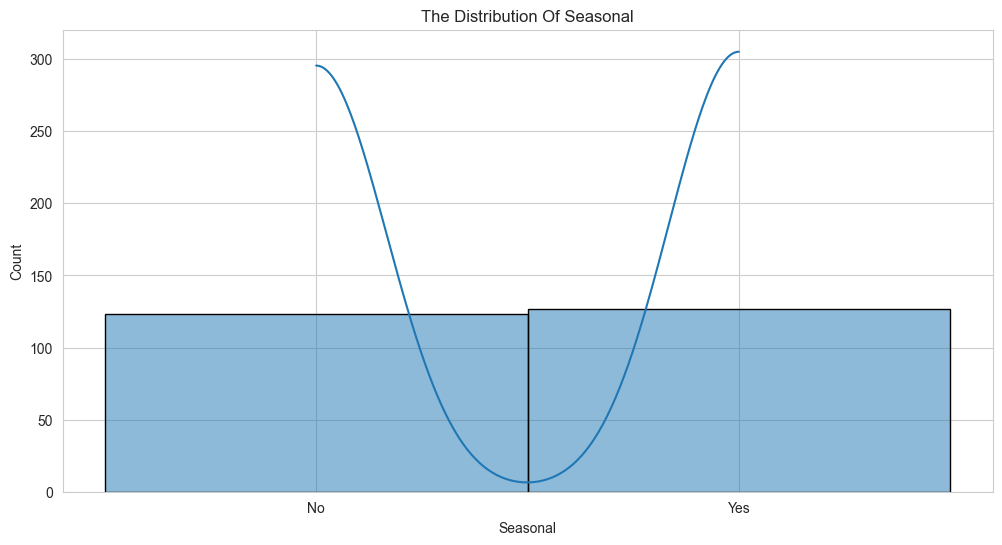

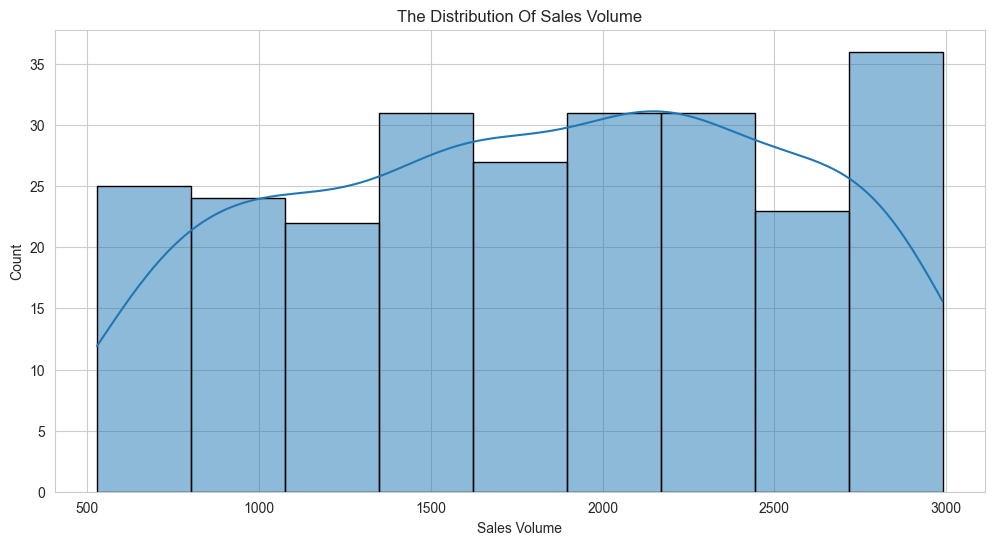

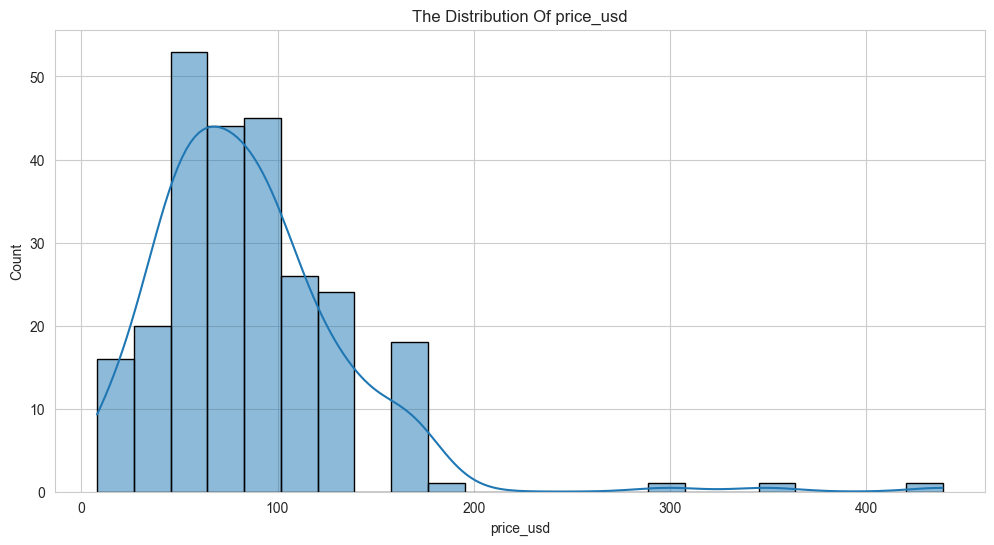

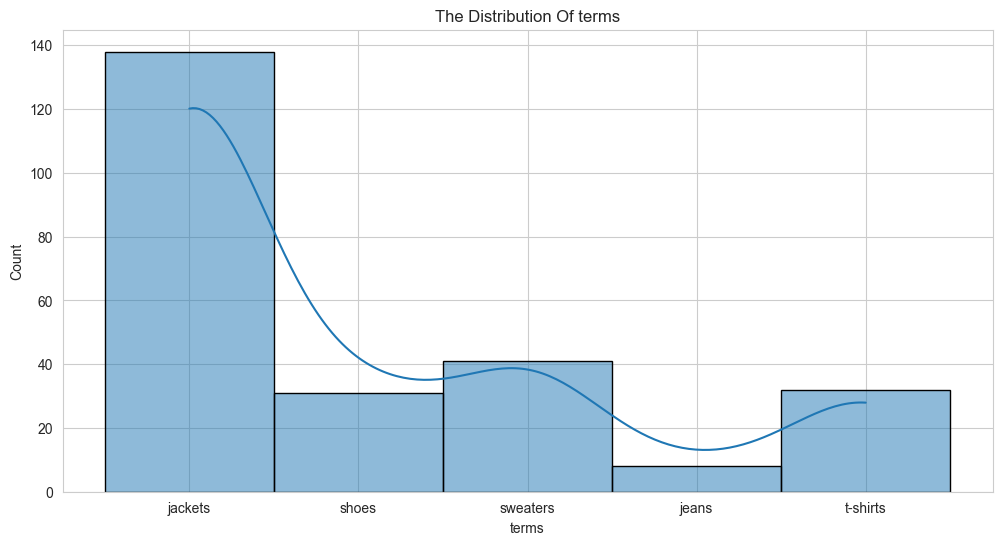

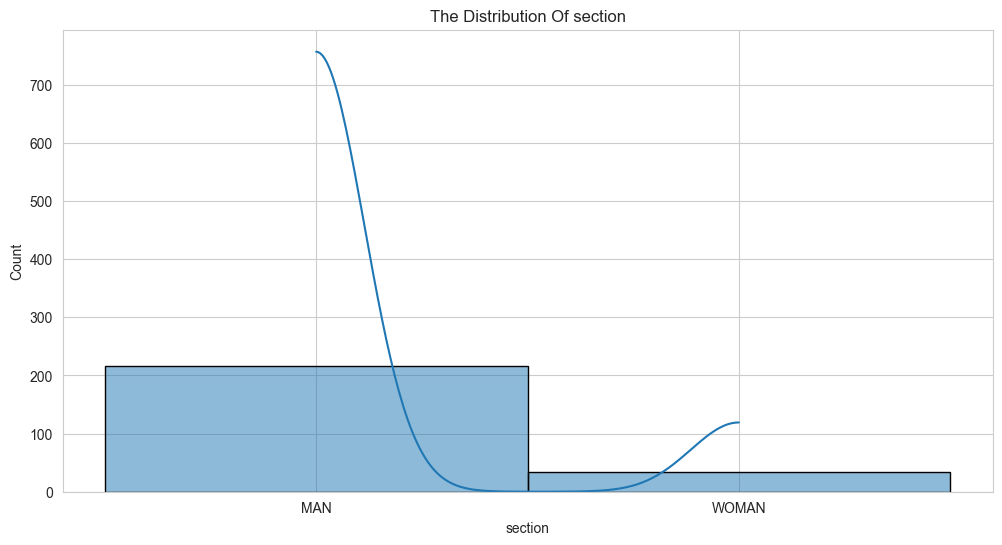

In [812]:
for col in df.drop(columns=["name"]):
    plt.figure(figsize=(12,6))
    sns.set_style('whitegrid')
    sns.histplot(data=df,x=col,kde=True,edgecolor='black')
    plt.title(f"The Distribution Of {col}")
    plt.show()

<Axes: >

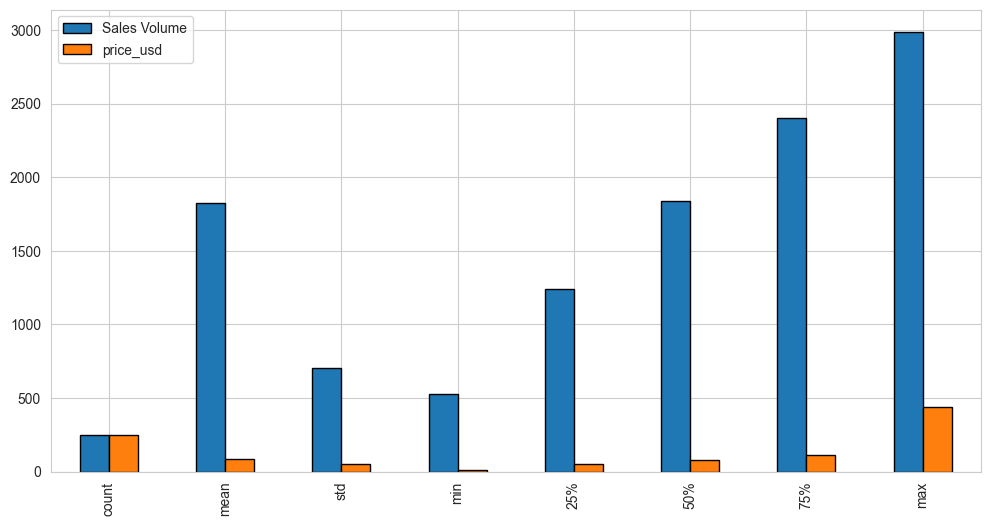

In [813]:
df.describe().plot(kind="bar",figsize=(12,6),edgecolor="black")

# Total Sales Volume by Section

In [814]:
section_sales = df.groupby("section")["Sales Volume"].sum().reset_index()
section_sales = section_sales.sort_values(by="Sales Volume", ascending=False)
print(section_sales)


  section  Sales Volume
0     MAN        392182
1   WOMAN         63374


In [815]:
import plotly.express as px

fig = px.bar(
    section_sales,
    x="section",
    y="Sales Volume",
    color="section",
    title="Total Sales Volume by Section",
    text="Sales Volume"
)

fig.update_layout(showlegend=False)
fig.show()


# Sales Volume by Promotion and Terms Interactive Visualization

In [816]:
import plotly.express as px

fig = px.sunburst(
    df,
    path=['Promotion', 'terms'],  # First level: Promotion, Second level: Terms
    values='Sales Volume',        # Size of each segment by sales
    color='Promotion',
    color_discrete_sequence=px.colors.qualitative.Set1,
    title='Sales Volume by Promotion and Terms'
)

fig.update_layout(width=700, height=700)
fig.show()


## Alternative Interactive Visualization

In [817]:
px.treemap(df, path=['Promotion', 'terms'], values='Sales Volume')


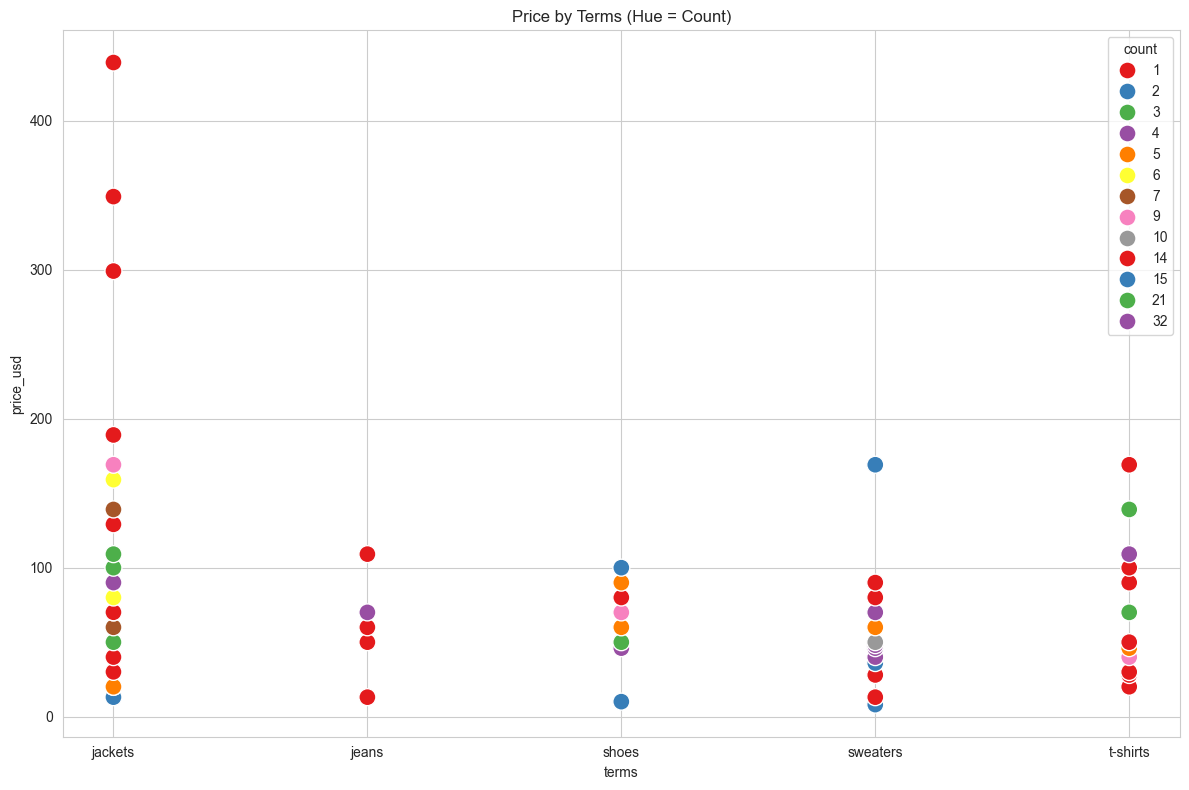

In [818]:
classifi_pr=df.groupby(["terms","price_usd"]).size().reset_index(name="count")
classifi_pr
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=classifi_pr,
    x="terms",
    y="price_usd",
    hue="count",
    palette="Set1",
    s=150  # fixed size of all points
)
plt.title("Price by Terms (Hue = Count)")
plt.tight_layout()
plt.show()


## Alternative interactive visualization for better understanding

In [819]:
import plotly.express as px

fig = px.scatter(
    classifi_pr,
    x="terms",
    y="price_usd",
    color="count",              # Color by count
    size=[150]*len(classifi_pr),  # Fixed size for each point
    size_max=50,
    color_continuous_scale="RdBu",
    title="Price by Terms (Color = Count)"
)

fig.update_layout(
    xaxis_title="Terms",
    yaxis_title="Price (USD)",
    width=1000,
    height=600
)

fig.show()


# Which product got sold out the most 

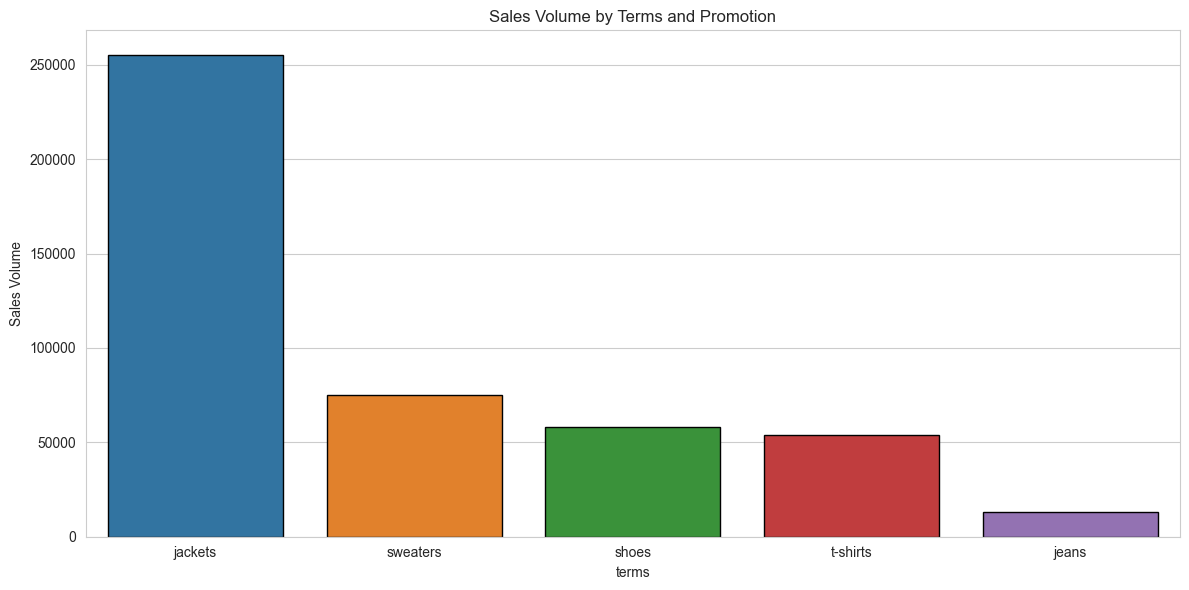

In [820]:
classifi_sold=df.groupby("terms")["Sales Volume"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=classifi_sold, x="terms", y="Sales Volume", hue="terms", edgecolor="black")
plt.title("Sales Volume by Terms and Promotion")
plt.tight_layout()
plt.show()

# Machine Learning
## Which factors drive the most impact on Sales Volume and attract customers the most
### Model - Random Forest Regressor 

In [821]:
import pandas as pd

# One-hot encode categorical columns
categorical_cols = ['Product Position', 'Promotion', 'Seasonal', 'name', 'terms', 'section']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define X and y
X = df_encoded.drop(columns=['Sales Volume'])
y = df_encoded['Sales Volume']


In [822]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)


RandomForestRegressor(random_state=42)

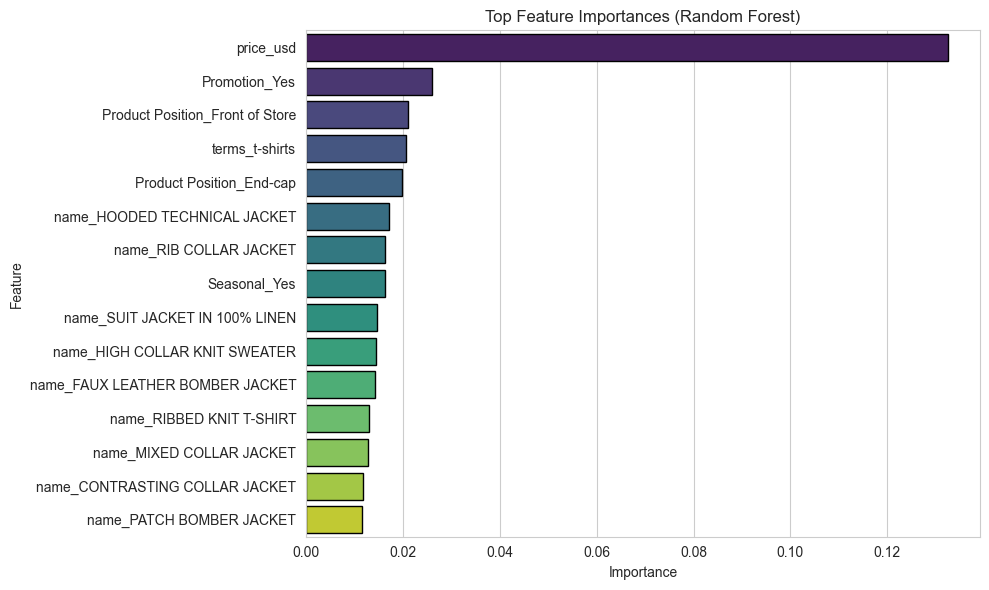

In [823]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame of features and importance
feat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False).head(15)  # top 15

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=feat_importance, x='Importance', y='Feature', palette='viridis',edgecolor="black")
plt.title("Top Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()